In [20]:
# Data Wrangling, I
# Perform the following operations using Python on dataset(e.g. employee.csv)
# 1.Import all the required Python Libraries. And Load the Dataset into pandas data frame.
# 2. Data Preprocessing: find the missing values in the data columnwise and display statistical information.
# 3. Provide variable descriptions. Types of variables etc.Check the dimensions of the data frame
# 4. Data Formatting Summarize the types of variables by checking the data types (i.e., character, numeric, integer, factor, and logical) of the variables in the data set. If variables are not in the correct data type, apply proper type conversions.
# 5. Data Normalization:Perform Z-Score transformation and plot box plot for any column
# 6.Turn categorical variables into quantitative variables in Python.

In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
df = pd.read_csv(r'C:\CODE\ds\DS\DS\PR_EXAM_DATASET\Employee.csv')  # Make sure employee.csv is in the same directory
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [9]:
# Step 3: Data Preprocessing
# Find missing values
print("Missing values per column:\n", df.isnull().sum())

# Display statistical information
print("\nStatistical Summary:\n")
print(df.describe(include='all'))


Missing values per column:
 Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Age_zscore                   0
dtype: int64

Statistical Summary:

        Education  JoiningYear       City  PaymentTier          Age Gender  \
count        4653  4653.000000       4653  4653.000000  4653.000000   4653   
unique          3          NaN          3          NaN          NaN      2   
top     Bachelors          NaN  Bangalore          NaN          NaN   Male   
freq         3601          NaN       2228          NaN          NaN   2778   
mean          NaN  2015.062970        NaN     2.698259    29.393295    NaN   
std           NaN     1.863377        NaN     0.561435     4.826087    NaN   
min           NaN  2012.000000        NaN     1.000000    22.000000    NaN   
25

In [11]:
# Step 4: Variable Descriptions and Dimensions
print("\nDataset Dimensions:", df.shape)
print("\nColumn-wise Data Types:\n", df.dtypes)

# Short variable description (manually written for context)
# description = {
#     'Education': 'Highest qualification',
#     'JoiningYear': 'Year of joining the company',
#     'City': 'Work location',
#     'PaymentTier': 'Salary tier (1=low, 3=high)',
#     'Age': 'Age of employee',
#     'Gender': 'Gender of employee',
#     'EverBenched': 'Ever kept without work (Yes/No)',
#     'ExperienceInCurrentDomain': 'Years of experience in current domain',
#     'LeaveOrNot': 'Target variable: whether the employee left (1) or stayed (0)'
# }
print("\nVariable Descriptions:\n", description)



Dataset Dimensions: (4653, 10)

Column-wise Data Types:
 Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
Age_zscore                    float64
dtype: object

Variable Descriptions:
 {'Education': 'Highest qualification', 'JoiningYear': 'Year of joining the company', 'City': 'Work location', 'PaymentTier': 'Salary tier (1=low, 3=high)', 'Age': 'Age of employee', 'Gender': 'Gender of employee', 'EverBenched': 'Ever kept without work (Yes/No)', 'ExperienceInCurrentDomain': 'Years of experience in current domain', 'LeaveOrNot': 'Target variable: whether the employee left (1) or stayed (0)'}


In [ ]:

# Step 5: Data Formatting - Check and Convert Data Types
categorical_cols = ['Education', 'City', 'Gender', 'EverBenched']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nData types after formatting:\n", df.dtypes)


Data types after formatting:
 Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
Age_zscore                    float64
dtype: object


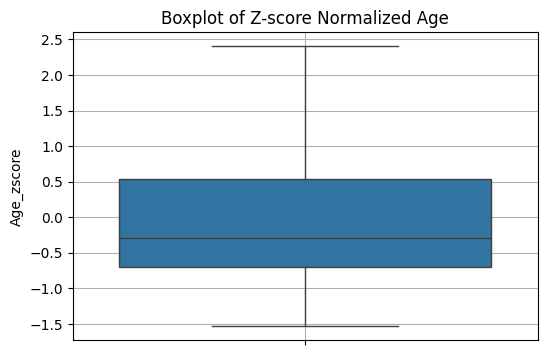

In [13]:
# Step 6: Data Normalization - Z-Score on 'Age'
scaler = StandardScaler()
df['Age_zscore'] = scaler.fit_transform(df[['Age']])

# Boxplot of Age (Z-score)
plt.figure(figsize=(6, 4))
sns.boxplot(y='Age_zscore', data=df)
plt.title('Boxplot of Z-score Normalized Age')
plt.grid()
plt.show()


In [14]:
# Step 7: Convert categorical variables to numerical values

# Map 'EverBenched' Yes/No to 1/0
df['EverBenched'] = df['EverBenched'].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical variables
categorical_cols = ['Education', 'City', 'Gender']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert all boolean columns (if any) to integers (0 and 1)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded.head()


,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Age_zscore,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male
0,2017,3,34,NaN,0,0,0.954645,0,0,0,0,1
1,2013,1,28,NaN,3,1,-0.288732,0,0,0,1,0
2,2014,3,38,NaN,2,0,1.783563,0,0,1,0,0
3,2016,3,27,NaN,5,1,-0.495961,1,0,0,0,1
4,2017,3,24,NaN,2,1,-1.117650,1,0,0,1,1
